In [1]:
IMAGE_DIM=32

In [2]:
import matplotlib.pyplot as plt
def distr(sample):
    fig,(ax1,ax2) = plt.subplots(1,2)
    print(sample.shape)
    ax1.matshow(sample.numpy().squeeze())
    ax2.hist(sample.numpy().reshape(-1), bins=100)
    plt.show()

/home/jekabs/anaconda3/envs/ml_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 32, 32])


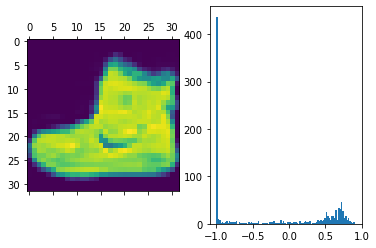

In [3]:
# Load Mnist dataset
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Resize, Compose, Normalize
mnist_data = FashionMNIST('data/fashion-mnist', train=True, download=True, transform=Compose([Resize(IMAGE_DIM), ToTensor(), Normalize(0.5, 0.5)]))
distr(mnist_data[0][0])

torch.Size([1, 32, 32])


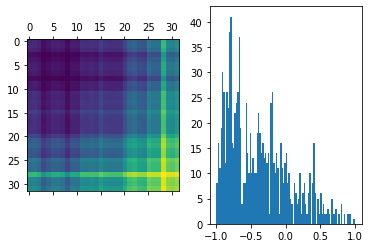

In [4]:

# Load Forex dataset
from dataset import ForexData
from transforms import pt_gaf, stretch

unsqueeze = lambda x: x.unsqueeze(0)

forex_data = ForexData(seq_length=IMAGE_DIM)
distr(forex_data[0])

Training...


Epoch [1/10]: 100%|██████████| 315/315 [00:06<00:00, 47.00it/s]


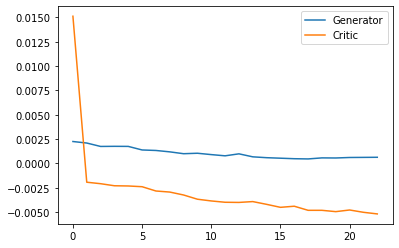

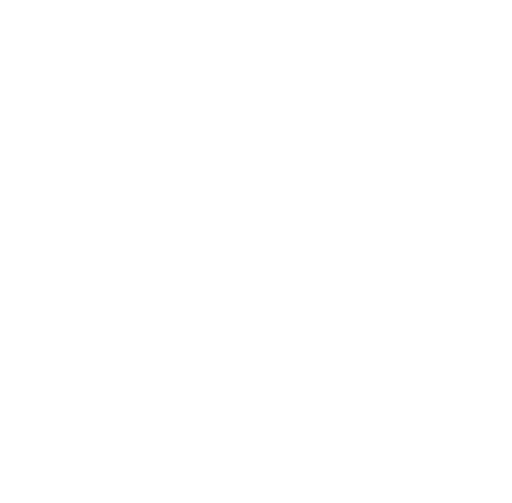

Epoch [2/10]: 100%|██████████| 315/315 [00:06<00:00, 48.41it/s]


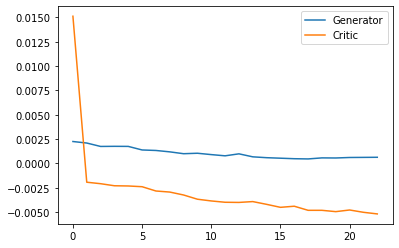

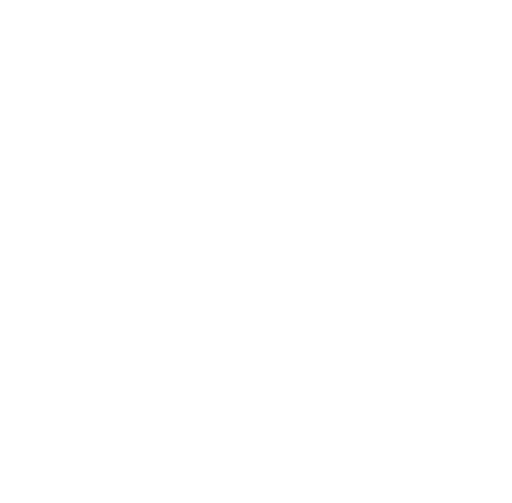

Epoch [3/10]:  67%|██████▋   | 212/315 [00:04<00:02, 48.59it/s]


KeyboardInterrupt: 

In [7]:
from models import Generator, Discriminator
from trainer import WGanTrainer, WGanGpTrainer
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

g = Generator()
g._initialize_weights()
d = Discriminator()

# g_optim = torch.optim.Adam(g.parameters(), lr=2e-4, betas=(0.0, 0.9))
# d_optim = torch.optim.Adam(d.parameters(), lr=2e-4, betas=(0.0, 0.9))

g_optim = torch.optim.RMSprop(g.parameters(), lr=5e-5)
d_optim = torch.optim.RMSprop(d.parameters(), lr=5e-5)
def epoch_callback(trainer):
    trainer.plot_losses()
    plt.show()
    samples = trainer.static_samples[-1]
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    for ax, img in zip(axes.flatten(), samples):
        ax.axis('off')
        ax.imshow(np.squeeze(img), cmap='gray_r')
    plt.show()


trainer = WGanTrainer(
    generator=g,
    critic=d,
    gen_optimizer=g_optim,
    critic_optimizer=d_optim,
    latent_dimension=100,
    device=device,
    epoch_callback=epoch_callback,
    critic_iterations=1,
)

from torch import stack
# data_loader = DataLoader(stack(classes[1]), batch_size=16, shuffle=True, drop_last=True)
data_loader = DataLoader(forex_data, batch_size=16, shuffle=True, drop_last=True)
trainer.train(data_loader, epochs=10)


In [6]:
noise = torch.randn(1,100).to(device)
samples = g(noise)

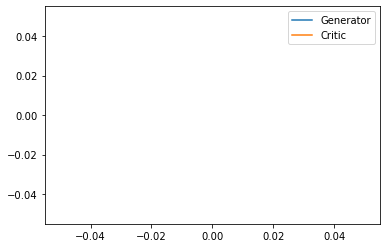

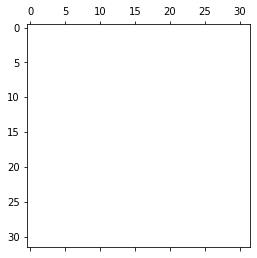

In [7]:
import matplotlib.pyplot as plt
trainer.plot_losses()
sample = trainer.sample_generator(1)[0].detach().cpu().numpy()
plt.matshow(sample[0])

In [8]:
static_samples = trainer.static_samples

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

fig, axes = plt.subplots(3,3,figsize=(9, 9))

ims = []
def plot(samples, axes):
    for sample, ax in zip(samples, axes.flatten()):
        ims.append(ax.imshow(np.squeeze(sample), cmap='gray_r'))
        ax.axis('off')

def update(samples, axes):
    for sample, im in zip(samples,ims):
        im.set_data(np.squeeze(sample))

plot(static_samples[0], axes)
def animate(i):
    return update(static_samples[i], axes)

anim = FuncAnimation(fig, animate, interval=100, frames=len(static_samples)-1)

writervideo = FFMpegWriter(fps=30)
anim.save('progress.mp4', writer=writervideo)
plt.close()

In [9]:
plt.matshow(.detach().cpu().numpy().squeeze())

SyntaxError: invalid syntax (3151612482.py, line 1)

In [ ]:
samples = trainer.sample(100)
fig, axes = plt.subplots(10,10,figsize=(30, 30))
for sample, ax in zip(samples, axes.flatten()):
    ax.imshow(np.squeeze(sample), cmap='gray_r')
    ax.axis('off')
plt.show()